<a href="https://colab.research.google.com/github/kristipatithoyajakshakashyap/Machine-Learning/blob/main/Salary%20Prediction/Salary_Prediction_with_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Linear Regeression**:
 
 **Y = mX + b**

 Y => Dependent variable

 X => Independent variable

 w => weight

 b => bias


**Gradient Descent**:

Gradient descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for uppdating the parameters of the learning model.

w = w - a*dw

b = b - a*db

**Learning Rate**:

Learning rate is a tuning parameter in a optimization algorithm that determine the step size at each iteration while moving toward a minimum of a loss function


In [19]:
#numpy library
import numpy as np 

Linear Regression

In [20]:
class Linear_Regression():
  # initiating the parameter(learning_rate & no_of_iterations)
  def __init__(self, learning_rate, no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  
  def fit(self, X, Y):
    #no of training examples(m) and no of features(n)
    self.m, self.n = X.shape #no of rows & columns
    #initiating the weight and bias
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    #implementing Gradient Descent
    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self):
    Y_prediction = self.predict(self.X)

    #calculate gradient
    dw = - (2 *(self.X.T).dot(self.Y - Y_prediction)) / self.m
    db = -2 * np.sum(self.Y - Y_prediction)/self.m

    #updating weight
    self.w = self.w  - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db
  def predict(self, x):

    return x.dot(self.w) + self.b    




# Work flow of the Linear Regression

step 1: set learning rate and no of iterations; Initiate random weight and bias value

step 2: Build Linear Regression Equation.( y= wx +b ) 

step 3: Fid the "y_pred" value for given x value for the corresponding weight & bias

step 4: Check the loss function for these parameter values.(different between "y_pred" &" true y")

step 5: Update the parameter values using Gradient Descent.

step 6: step 3, 4, 5 are repeated till we get minimum loss function

Finally we will get the best model (best weight and bias value) as it has minimum loss function

Using Linear Regression model for Prediction

In [21]:
# importing the dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

Data pre-processing

In [22]:
#loading the data csv to pandas df

salary_data  = pd.read_csv("/content/salary_data.csv")

In [23]:
# prinitng 1st 5 rows of df
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [24]:
# print no of rows and shapes
salary_data.shape

(30, 2)

In [25]:
# checking for missing values
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Spliting the feature and target value

In [26]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [27]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [28]:
Y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

Spliting the dataset into training and testing data

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state = 2)

Training the linear Regression model

In [37]:
model = Linear_Regression(learning_rate=0.02, no_of_iterations=100)

In [38]:
model.fit(X_train, Y_train)

In [39]:
#print the parameter values (weight & bias)

print('weight = ', model.w[0])
print('bias = ', model.b)

weight =  10941.258155090314
bias =  13499.045037502532


y = 9514(x) + 23697

salary = 9514(experience) + 23697

Predict the salary value for test data

In [40]:
test_data_prediction = model.predict(X_test)

In [41]:
print(test_data_prediction)

[ 27722.68063912  25534.4290081   62734.70673541  53981.70021134
  91181.97793864  79146.59396804 103217.36190924  46322.81950277
  35381.56134768  87899.60049212]


Visualising the predicted values & actual values

Text(0.5, 1.0, 'Salary vs Experience')

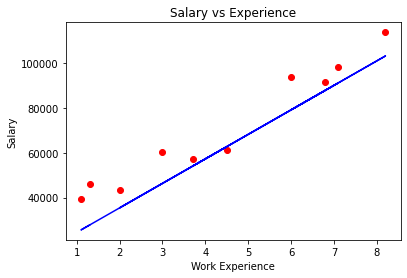

In [42]:
plt.scatter(X_test, Y_test, color='red')
plt.plot(X_test, test_data_prediction, color='blue')
plt.xlabel('Work Experience')
plt.ylabel("Salary")
plt.title('Salary vs Experience')